#**FINANCE DATA ANALYSIS**

# Perform descriptive analysis on data




In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [86]:
df = pd.read_excel("/content/drive/My Drive/Bank Personal Loan Modelling.xlsx",1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [87]:
df.shape

(5000, 14)

In [88]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [89]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [90]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [91]:
import plotly.express as px

In [92]:
fig = px.box(df,y=['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

# Understanding data & data-preprocessing

In [93]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [94]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80159e8e50>,
      dtype=object)

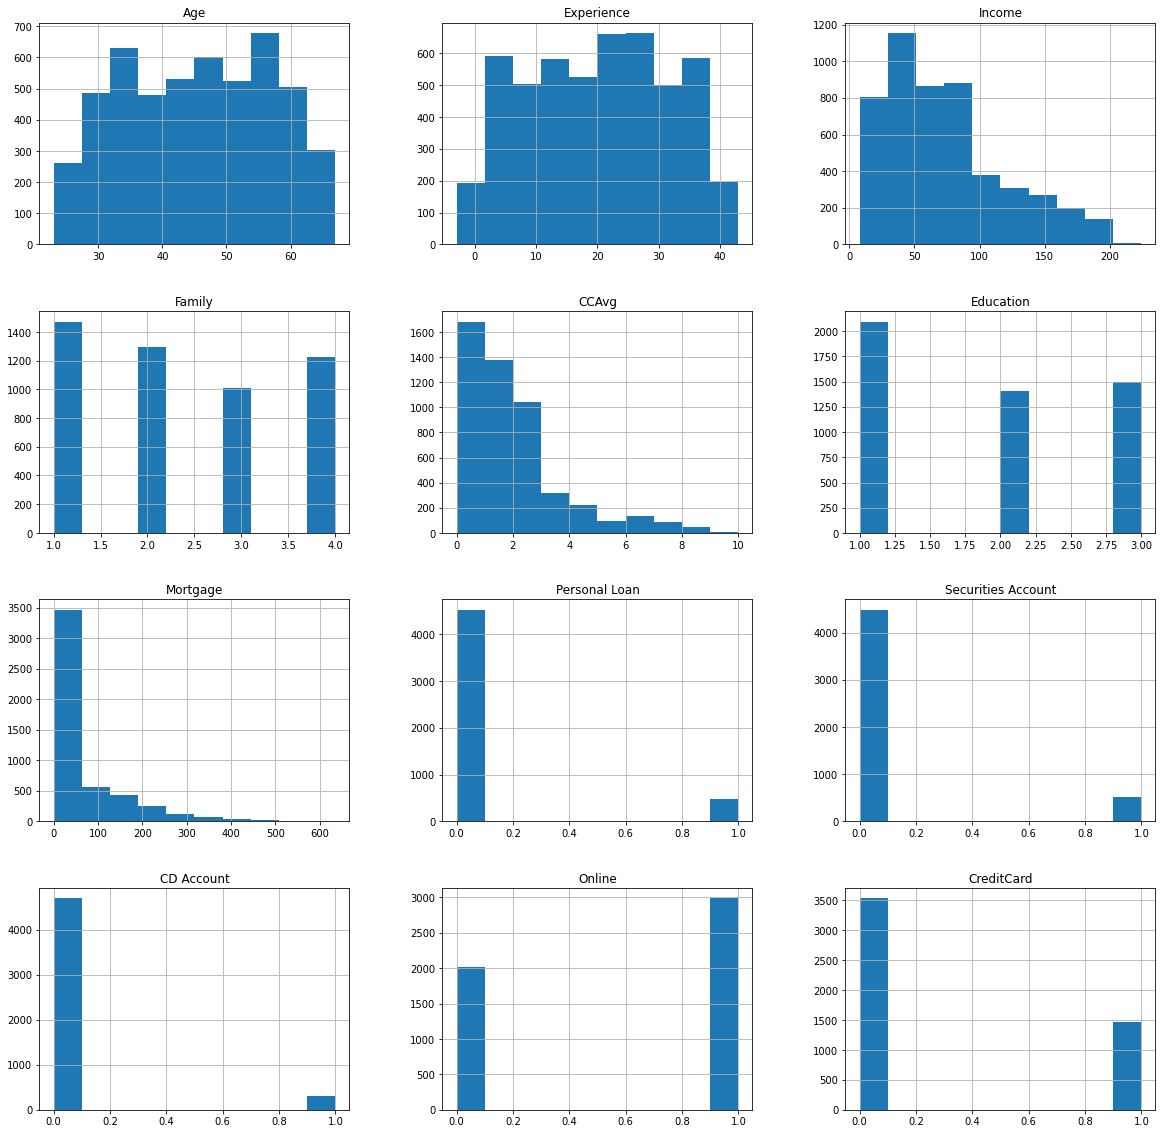

In [95]:
df.hist(figsize=(20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



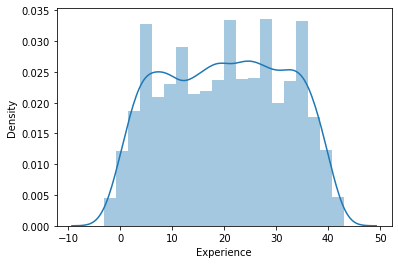

In [96]:
sns.distplot(df['Experience'])

In [97]:
df['Experience'].mean()

20.1046

In [98]:
Negative_exp=df[df['Experience']<0]
Negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



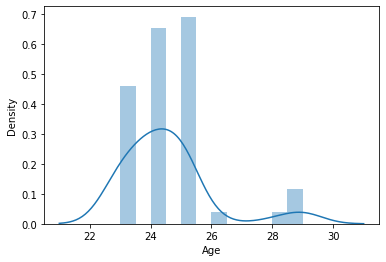

In [99]:
sns.distplot(Negative_exp['Age'])

In [100]:
Negative_exp['Experience'].mean()

-1.4423076923076923

In [101]:
Negative_exp.size

624

In [102]:
print('There are {} records which has negative values for experience, approx {}'.format(Negative_exp.size , ((Negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04


In [103]:
data = df.copy()

In [104]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [105]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [106]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


# Analyse education status of customers

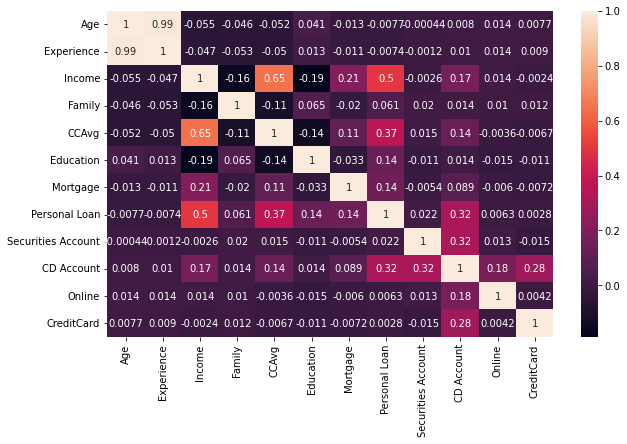

In [107]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [108]:
data=data.drop(['Experience'],axis=1)

In [109]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [110]:
data['Education'].unique()

array([1, 2, 3])

In [111]:
def mark(x):
  if x==1:
    return 'Undergrad'
  elif x==2:
    return 'Graduate'
  else:
    return 'Advanced/Professional'

In [112]:
data['Edu_mark']=data['Education'].apply(mark)

In [113]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [114]:
EDU_dis=data.groupby('Edu_mark')['Age'].count()

In [115]:
EDU_dis

Edu_mark
Advanced/Professional    1501
Graduate                 1403
Undergrad                2096
Name: Age, dtype: int64

In [116]:
fig=px.pie(data, values=EDU_dis, names=EDU_dis.index, title='Pie Chart')
fig.show()

# Analyse account holder distribution

In [117]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark'],
      dtype='object')

In [118]:
def Security_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
      return 'Holds Securities & Deposit'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
      return 'Does not Holds Securities or Deposit'
    elif (row['Securities Account']==1) & (row['CD Account']==0):
      return 'Holds only Securites'
    elif (row['Securities Account']==0) & (row['CD Account']==1):
      return 'Holds only Deposit'

In [119]:
data['Account_holder_category']=data.apply(Security_CD,axis=1)

In [120]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergrad,Holds only Securites
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergrad,Holds only Securites
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergrad,Does not Holds Securities or Deposit
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Does not Holds Securities or Deposit
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Does not Holds Securities or Deposit


In [121]:
values=data['Account_holder_category'].value_counts()
values.index

Index(['Does not Holds Securities or Deposit', 'Holds only Securites',
       'Holds only Deposit', 'Holds Securities & Deposit'],
      dtype='object')

In [122]:
fig = px.pie(data, values=values, names=values.index, title="Pie Chart")
fig.show()

# Analyse customer on the basis of their education status, income & personal loan status

In [123]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

In [124]:
px.box(data,x='Education',y='Income',facet_col='Personal Loan')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



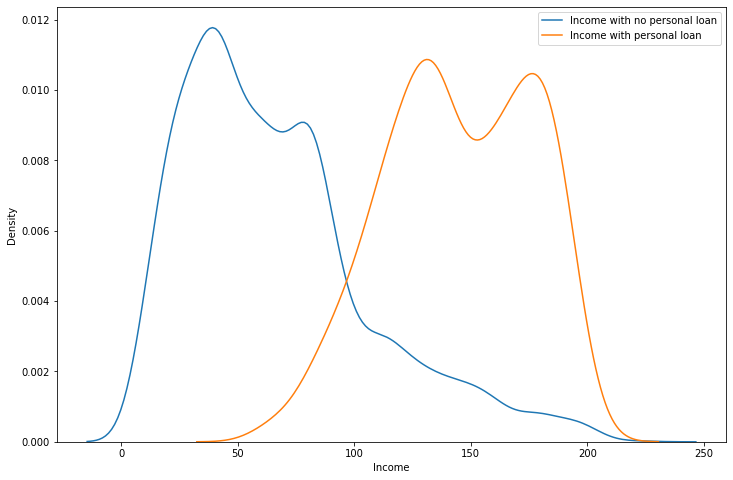

In [125]:
plt.figure(figsize=(12,8))
sns.distplot(data[data['Personal Loan']==0]['Income'],hist=False, label='Income with no personal loan')
sns.distplot(data[data['Personal Loan']==1]['Income'],hist=False, label='Income with personal loan')
plt.legend()

In [126]:
def plot(col1,col2,label1,label2,title):
  plt.figure(figsize=(12,8))
  sns.distplot(data[data[col2]==0][col1],hist=False, label=label1)
  sns.distplot(data[data[col2]==1][col1],hist=False, label=label2)
  plt.legend()
  plt.title(title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



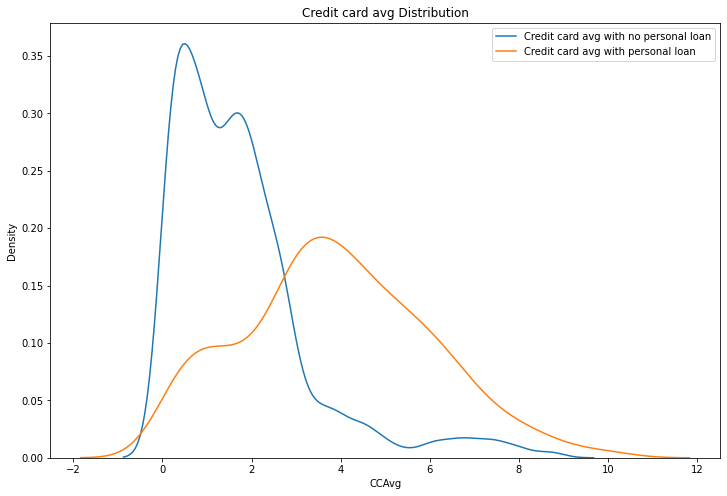

In [127]:
plot('CCAvg','Personal Loan','Credit card avg with no personal loan', 'Credit card avg with personal loan', 'Credit card avg Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



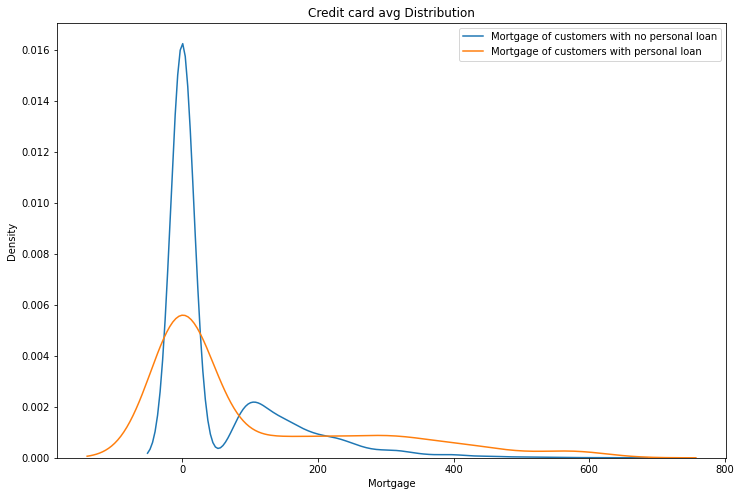

In [128]:
plot('Mortgage','Personal Loan','Mortgage of customers with no personal loan','Mortgage of customers with personal loan','Credit card avg Distribution')

# Analyse categories of customers on the basis of security account, online, account holder category & credit card

In [129]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Edu_mark', 'Account_holder_category'],
      dtype='object')

In [130]:
col_names=['Securities Account','Online','Account_holder_category','CreditCard']

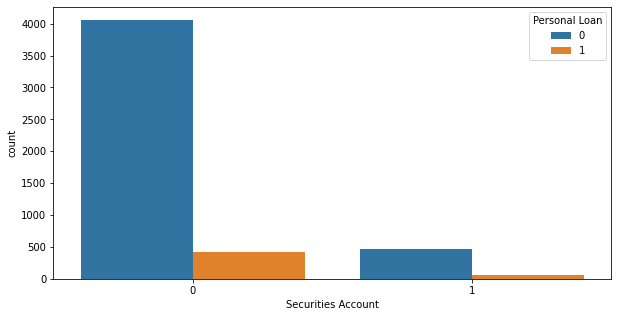

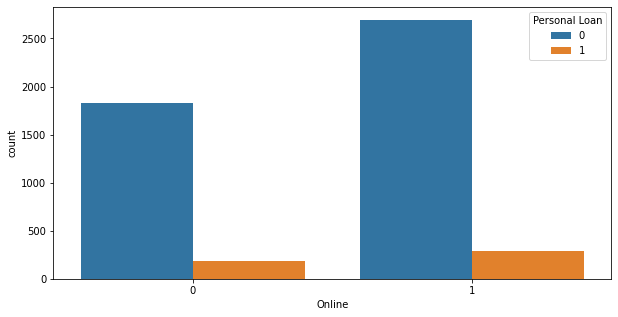

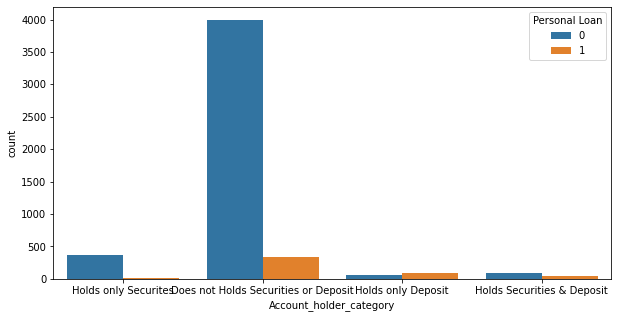

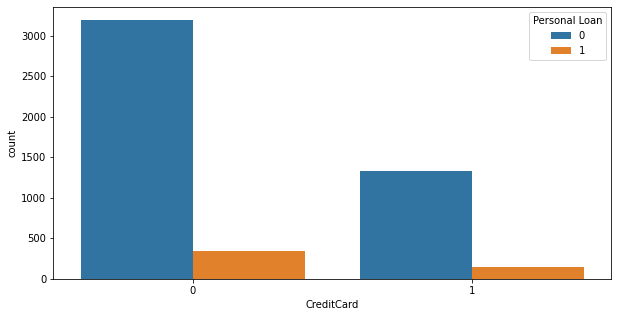

In [131]:
for i in col_names:
  plt.figure(figsize=(10,5))
  sns.countplot(x=i,hue='Personal Loan',data=data)

# Perform hypothesis on data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



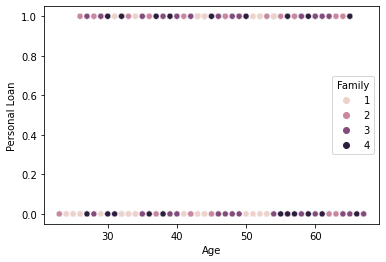

In [132]:
sns.scatterplot(data['Age'],data['Personal Loan'],hue=data['Family'])

In [133]:
import scipy.stats as stats

In [134]:
Ho='Age does not have impact on availing personal loan'
Ha='Age does have impact on availing personal loan'

In [135]:
Age_no=np.array(data[data['Personal Loan']==0]['Age'])
Age_yes=np.array(data[data['Personal Loan']==1]['Age'])

In [136]:
t, p_value=stats.ttest_ind(Age_no, Age_yes, axis=0)
if p_value<0.05:
  print(Ha,' as the p_value is less than 0.05 with a value of {}'.format(p_value))
else:
  print(Ho,' as the p_value is greater than 0.05 with a value of {}'.format(p_value))

Age does not have impact on availing personal loan  as the p_value is greater than 0.05 with a value of 0.584959263705325


In [137]:
def Hypothesis(col1,col2,Ho,Ha):
    arr1=np.array(data[data[col1]==0][col2])
    arr2=np.array(data[data[col1]==1][col2])
    t, p_value=stats.ttest_ind(arr1,arr2,axis=0)
    if p_value<0.05:
        print('{}, as the p_value is less than 0.05 with a value of {}'.format(Ha,p_value))
    else:
        print('{} as p_value is greater than 0.05 with a value of {}'.format(Ho,p_value))

In [138]:
Hypothesis('Personal Loan','Age',Ho='Age does not have impact on availing personal loan',Ha='Age does have impact on availing personal loan')

Age does not have impact on availing personal loan as p_value is greater than 0.05 with a value of 0.584959263705325


In [139]:
Hypothesis('Personal Loan','Income',Ho='Income does not have impact on availing personal loan',Ha='Income does have impact on availing personal loan')

Income does have impact on availing personal loan, as the p_value is less than 0.05 with a value of 0.0


In [140]:
Hypothesis('Personal Loan','Family',Ho='Family does not have impact on availing personal loan',Ha='Family does have impact on availing personal loan')

Family does have impact on availing personal loan, as the p_value is less than 0.05 with a value of 1.4099040685673807e-05
